In [1]:
#!pip install yfinance

import yfinance as yf


In [135]:
data = yf.download('SQQQ', start = '2021-01-01')

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,75.000000,82.250000,74.900002,79.199997,79.199997,17903060
2021-01-05,80.000000,80.000000,77.150002,77.250000,77.250000,10119320
2021-01-06,80.800003,81.650002,77.199997,80.449997,80.449997,20570880
2021-01-07,78.300003,78.300003,73.949997,74.449997,74.449997,12022620
2021-01-08,72.949997,74.550003,71.449997,71.699997,71.699997,17438240
...,...,...,...,...,...,...
2022-05-25,60.320000,60.459999,55.549999,56.900002,56.900002,109383100
2022-05-26,57.330002,57.520000,51.220001,52.160000,52.160000,99084900
2022-05-27,50.470001,50.520000,46.970001,47.009998,47.009998,97902900


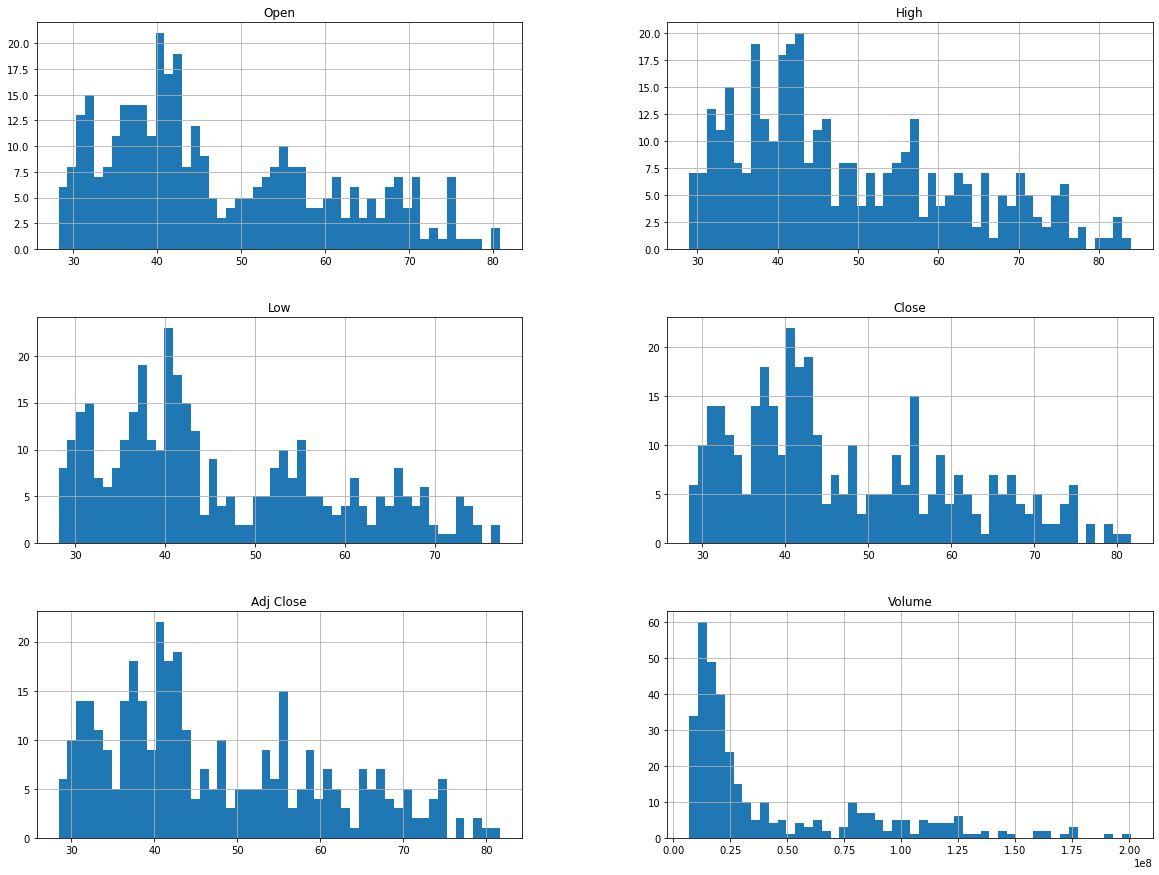

In [136]:
%matplotlib inline
import matplotlib.pylab as plt
data.hist(bins=50, figsize=(20,15))
plt.show()


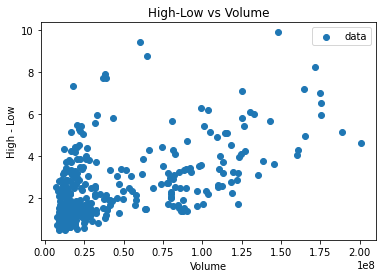

In [137]:
import matplotlib.pylab as plt

compA = pd.DataFrame()
compA['Diff'] = data.High - data.Low
compA['Volume'] = data['Volume']

plt.scatter( compA['Volume'], compA['Diff'], label = "data")

plt.title('High-Low vs Volume')
plt.legend(loc = "best")
plt.xlabel('Volume')
plt.ylabel('High - Low')
plt.show()



In [73]:

dif = data.High - data.Low
up_tot = 0
down_tot = 0
cnt = 0.0

for i in range(1, len(data)):
    #print('(%f) => (%f)' % (data.Open[i-1], data.Open[i]))
    if data.Open[i] > data.Open[i-1]*1.04:
        cnt += 1
        print('(%f) => (%f) = %f:%f' % (data.Open[i-1], data.Open[i], up_tot, down_tot))
        
        up_tot += (data.High[i-1]-data.Open[i-1]) - (data.High[i]-data.Open[i])
        down_tot += (data.Open[i-1]-data.Low[i-1]) - (data.Open[i]-data.Low[i])
    
if up_tot*down_tot != 0:
    up_ave = up_tot / cnt
    down_ave = down_tot / cnt
    print('%f / %d = %f' % (up_tot, cnt, up_ave))
            
print(up_ave)
print(down_ave)


(28.600000) => (30.200001) = 0.000000:0.000000
(30.200001) => (33.099998) = -0.500002:-0.250000
(32.700001) => (35.049999) = 1.399996:-1.299999
(31.420000) => (34.860001) = 1.399996:-2.349998
(36.160000) => (39.330002) = 4.329998:-3.629997
(39.330002) => (43.900002) = 4.369999:-3.259998
(42.450001) => (44.849998) = 2.769997:-5.279999
(35.299999) => (38.560001) = 4.299992:-8.179996
(38.259998) => (39.810001) = 4.179993:-9.060001
(38.060001) => (41.919998) = 5.369995:-10.400005
(39.549999) => (41.549999) = 8.479992:-11.510002
(41.549999) => (44.490002) = 8.319992:-11.410004
(43.369999) => (52.700001) = 9.389996:-13.390007
(39.590000) => (43.180000) = 14.039997:-22.750008
(44.110001) => (49.360001) = 15.569996:-23.250008
(44.540001) => (49.220001) = 18.689995:-26.960007
(32.070000) => (35.340000) = 20.449997:-28.390007
(36.290001) => (38.660000) = 21.049995:-28.530006
(38.169998) => (40.290001) = 20.859993:-28.620007
(37.910000) => (40.930000) = 23.339996:-30.680008
(38.020000) => (41.799

Total Gain = 49.700005


/tmp/ipykernel_1565/260895178.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.plot(figsize=(18, 6), y={'Open', 'High', 'Low', 'diff'})


<AxesSubplot:xlabel='Date'>

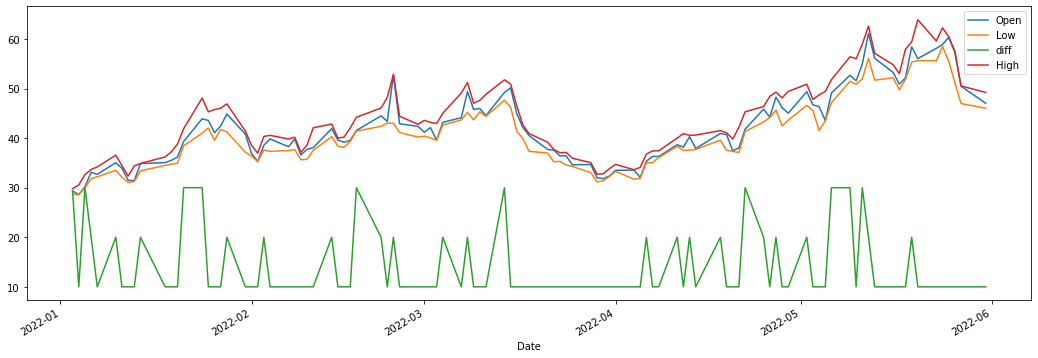

In [86]:
diff = data.Open.copy()
totGain = 0
for i in range(1, len(data)):
    if data.Open[i] > data.Open[i-1]*1.05:
        totGain += data.High[i]-data.Open[i]
        if data.High[i] / data.Open[i] > 1.05:  
            diff[i] = 30
        else:
            diff[i] = 20
    else:
        diff[i] = 10
       
data['diff'] = diff

print('Total Gain = %f' % totGain)

%matplotlib inline
data.plot(figsize=(18, 6), y={'Open', 'High', 'Low', 'diff'})
#ax = city_df.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)

In [46]:
#!pip3 install pymongo
import pymongo

id = 'frogmon'
pw = 'rhlrnf8359!'
host = 'frogmon.synology.me'
aport = 27017
client = pymongo.MongoClient("mongodb://%s:%s@%s:%s/?serverSelectionTimeoutMS=5000&connectTimeoutMS=10000" % (id, pw, host, aport))

db = client.stock
col = db.stock_info
stock_data = col.find({"symbol": 'AAPL'})

stock_data[0]['symbol']

'AAPL'

In [109]:
import sklearn
import pandas as pd

oecd_bli = pd.read_csv("/home/jovyan/AIs/src/oecd_bil_2015.csv", thousands=',')

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
#oecd_bli
oecd_bli = oecd_bli.pivot(index= "Country", columns="Indicator", values="Value")
#oecd_bli

gdp_per_capita = pd.read_csv("/home/jovyan/AIs/src/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(15)

full_country_stats = pd.merge(left=oecd_bli, right = gdp_per_capita, left_index=True, right_index=True)
full_country_stats


,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,16.06,88.0,94.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",52114.165,2015.0
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,14.90,64.0,79.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17288.083,2014.0
